<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [3]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-08-02 12:21:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-08-02 12:21:28 (114 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [12]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [13]:
df.tail(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
336,389,389,COLLECTION,1000,15,9/11/2016,10/25/2016,32,High School or Below,male
337,390,390,COLLECTION,1000,15,9/11/2016,9/25/2016,30,college,male
338,391,391,COLLECTION,800,15,9/11/2016,9/25/2016,35,High School or Below,male
339,392,392,COLLECTION,1000,30,9/11/2016,10/10/2016,29,college,female
340,393,393,COLLECTION,1000,30,9/11/2016,11/9/2016,26,college,male
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [14]:
df.shape

(346, 10)

### Convert to date time object


In [15]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [16]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [17]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y


CondaError: 
Dear Python user at Bosch,

You cannot modify the base Anaconda installation, e.g. install or update
packages, because the base directory is set to read-only by SCCM.

You have to create a new conda environment in which you can install
or modify any package you want.

To create a new conda environment, use the Anaconda Navigator, or run
a command on the command line:

    conda create --name ENV_NAME PACKAGE PACKAGE2 ...

For example:

    conda create --name my36env python=3.6 spyder pandas

In case of other Python problems, take a look at the Python forum in
Bosch Connect, search for your problems and if you don't find a solution,
post your questions there with a detailed error description:

http://bos.ch/Wmi

Thanks.



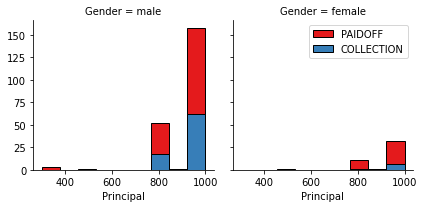

In [18]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

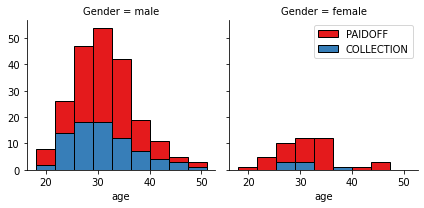

In [19]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

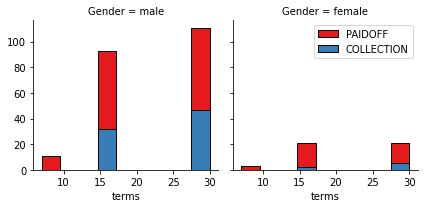

In [20]:
bins = np.linspace(df.terms.min(), df.terms.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'terms', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


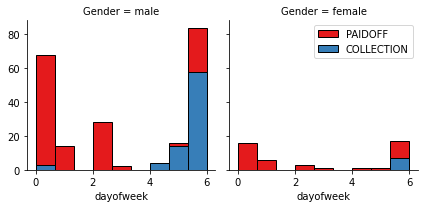

In [21]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [22]:
df['dayofweek']

0      3
1      3
2      3
3      4
4      4
      ..
341    6
342    6
343    0
344    0
345    0
Name: dayofweek, Length: 346, dtype: int64

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [23]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [24]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [25]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [26]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [27]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [28]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [29]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [30]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [31]:
# y[0:300]

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [32]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


In [228]:
# changed for testing

# Weekend chnged form 3 to 4 
# "Master" introduced as extra column -> no pos effect
# changed Train/test set -> positive effect to the train values, but maybe overfitting


In [34]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [35]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=9)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (311, 8) (311,)
Test set: (35, 8) (35,)


In [37]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

In [38]:
# Evaluation
print("K-Means Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("K-Means  ?StandardAbweichung: ", np.std(yhat==y_test)/np.sqrt(yhat.shape[0]))


K-Means Accuracy:  0.8
K-Means  ?StandardAbweichung:  0.06761234037828134


*Automatically finding the best value*

In [39]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.77142857, 0.8       , 0.77142857, 0.74285714, 0.8       ,
       0.77142857, 0.77142857, 0.77142857, 0.71428571])

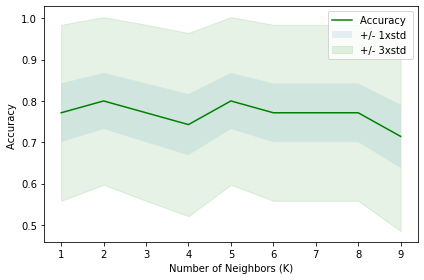

In [40]:
# Plot graph including 1x Standard deviationa and 3x standard deviation range
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [41]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8 with k= 2


# Decision Tree


In [42]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

Train set Accuracy:  0.7491961414790996
DecisionTrees's Accuracy:  0.7714285714285715
DecisionTrees's ?StandardAbweichung:  0.07097817181807071


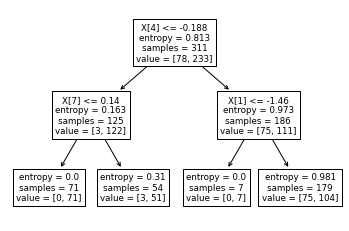

In [43]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 2)
drugTree.fit(X_train,y_train)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, drugTree.predict(X_train)))
predTree = drugTree.predict(X_test)

# Evaluation
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print("DecisionTrees's ?StandardAbweichung: ", np.std(predTree==y_test)/np.sqrt(predTree.shape[0]))
# Visualisation
tree.plot_tree(drugTree)
plt.show()

*Automatically finding the best value*

In [44]:
depth = 20
mean_acc = np.zeros((depth-1))
std_acc = np.zeros((depth-1))

for n in range(1,depth):
    
    #Train Model and Predict  
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    drugTree.fit(X_train,y_train)
    predTree = drugTree.predict(X_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, predTree)
    
    std_acc[n-1]=np.std(predTree==y_test)/np.sqrt(predTree.shape[0])

mean_acc

array([0.77142857, 0.77142857, 0.77142857, 0.77142857, 0.68571429,
       0.68571429, 0.68571429, 0.65714286, 0.65714286, 0.68571429,
       0.71428571, 0.65714286, 0.68571429, 0.68571429, 0.68571429,
       0.68571429, 0.68571429, 0.68571429, 0.68571429])

In [45]:
print( "The best accuracy was with", mean_acc.max(), "with depth=", mean_acc.argmax()+1)


The best accuracy was with 0.7714285714285715 with depth= 1


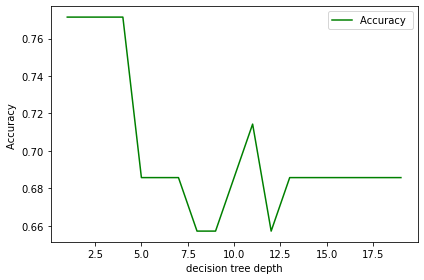

In [46]:
# Plot graph including 1x Standard deviationa and 3x standard deviation range
plt.plot(range(1,depth),mean_acc,'g')
# plt.fill_between(range(1,depth),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
# plt.fill_between(range(1,depth),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('decision tree depth')
plt.tight_layout()
plt.show()

# Support Vector Machine


In [47]:
from sklearn import svm
#clf = svm.SVC(kernel='poly', degree=5)
# clf = svm.SVC(kernel='linear') # maybe extra parameter per model needed 
clf = svm.SVC(kernel='sigmoid') # maybe extra parameter per model needed 
clf.fit(X_train, y_train) 
# Prediction
yhat = clf.predict(X_test)

In [48]:
# Evaluation
print("Support Vector machine Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Support Vector machine ?StandardAbweichung: ", np.std(yhat==y_test)/np.sqrt(yhat.shape[0]))

Support Vector machine Accuracy:  0.8
Support Vector machine ?StandardAbweichung:  0.06761234037828133


*Automatically finding the best value*

In [49]:
Ks = 4
mean_acc = np.zeros((Ks))
std_acc = np.zeros((Ks))

model = ['rbf','linear','sigmoid', 'poly'] # 'polynomial'

for n in range(0,Ks):
    
    #Train Model and Predict  
    clf = svm.SVC(kernel=model[n])
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    
    mean_acc[n] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.74285714, 0.77142857, 0.8       , 0.77142857])

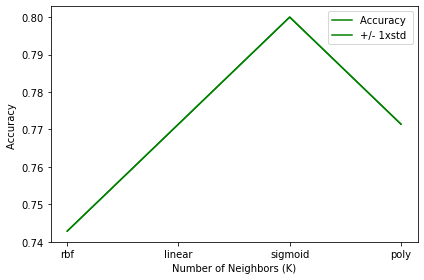

In [50]:
# Plot graph including 1x Standard deviationa and 3x standard deviation range

plt.plot(range(0,Ks),mean_acc,'g')
plt.plot(model,mean_acc,'g')
# plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
# plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [51]:
print( "The best accuracy was with", mean_acc.max(), "with model", model[mean_acc.argmax()])

The best accuracy was with 0.8 with model sigmoid


# Logistic Regression


solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’

Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

* For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
* For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
* ‘liblinear’ might be slower in LogisticRegressionCV because it does not handle warm-starting. ‘liblinear’ is limited to one-versus-rest schemes.

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [198]:
# special train/test set for logitic regression
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=9)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [215]:
LR = LogisticRegression(C=0.2, solver='liblinear').fit(X_train,y_train)
# Prediction
yhat = LR.predict(X_test)

#yhat_prob = LR.predict_proba(X_test)

In [216]:
# Evaluation
print("Logistics Reression Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Logistics Reression  ?StandardAbweichung: ", np.std(yhat==y_test)/np.sqrt(yhat.shape[0]))

Logistics Reression Accuracy:  0.8
Logistics Reression  ?StandardAbweichung:  0.047809144373375745


In [201]:
# yhat_prob = LR.predict_proba(X_test)
# Evaluation
# print("Logistics Reression Accuracy: ", metrics.accuracy_score(y_test, yhat_prob))
# print("Logistics Reression  ?StandardAbweichung: ", np.std(yhat_prob==y_test)/np.sqrt(yhat_prob.shape[0]))

In [202]:
#yhat

In [203]:
Ks = 5
mean_acc = np.zeros((Ks))
std_acc = np.zeros((Ks))

model = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # 'polynomial'

for n in range(0,Ks):
    
    #Train Model and Predict 
    LR = LogisticRegression(C=0.4, solver=model[n]).fit(X_train,y_train)
    # Prediction
    yhat = LR.predict(X_test)
       
    mean_acc[n] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.8, 0.8, 0.8, 0.8, 0.8])

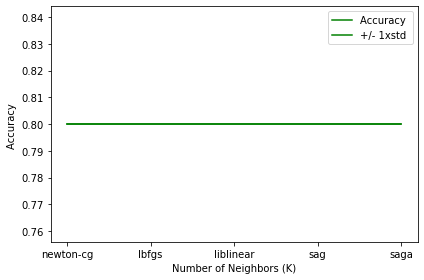

In [204]:
# Plot graph including 1x Standard deviationa and 3x standard deviation range

plt.plot(range(0,Ks),mean_acc,'g')
plt.plot(model,mean_acc,'g')
# plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
# plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [214]:
Ks = 10
mean_acc = np.zeros((Ks))
std_acc = np.zeros((Ks))

model = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # 'polynomial'

for n in range(0,Ks):
    
    #Train Model and Predict 
    LR = LogisticRegression(C=0.1+n/(Ks), solver='liblinear').fit(X_train,y_train)
    # Prediction
    yhat = LR.predict(X_test)
       
    mean_acc[n] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8])

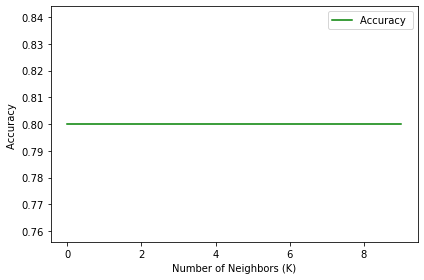

In [206]:
# Plot graph including 1x Standard deviationa and 3x standard deviation range

plt.plot(range(0,Ks),mean_acc,'g')
# plt.plot(model,mean_acc,'g')
# plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
# plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [207]:
print( "The best accuracy was with", mean_acc.max(), "with model: liblinear c= ", 0.1+ mean_acc.argmax()/10)

The best accuracy was with 0.8 with model: liblinear c=  0.1


*Traning Results* with original feature vector: 'Principal','terms','age','Gender','weekend', splitted 'Education'

| Algorithm          | Regression Accuracy | Standard deviation |  |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.7285714285714285       | 0.053151414715860344       | NA      |
| Decision Tree      | 0.7428571428571429       | 0.05223852001886091       | NA      |
| SVM                | 0.7428571428571429       | 0.05223852001886091      | NA      |
| LogisticRegression | 0.7428571428571429       | 0.05223852001886091        | NA      |


*Traning Results* with original feature vector: 'Principal','terms','age','Gender','weekend', splitted 'Education' 
AND
Train/Testset split 95%/5%

| Algorithm          | Regression Accuracy | Standard deviation |  |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.8333333333333334       | 0.08784104611578833       | NA      |
| Decision Tree      | 0.7777777777777778       | 0.09799078929868855       | NA      |
| SVM                | 0.7777777777777778       | 0.09799078929868855      | NA      |
| LogisticRegression | 0.8333333333333334       | 0.08784104611578833        | NA      |


# Model Evaluation using Test set


In [188]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [568]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-08-02 14:19:49--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-08-02 14:19:50 (49.9 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [217]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [218]:
# 1) Test set umformatieren und in die Variablen für Test schrieben
# 2) Evluation auf Basis der neuen testdaten machen pro Cluster Methode einzeln
# 3) Scores aufschreiben

In [219]:
# Umformatierung beide Datums-Spalten
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [220]:
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [221]:
test_X = test_Feature
test_X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [222]:
test_y = test_df['loan_status'].values
test_y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [223]:
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

### Test K-nearest Neighbor

In [157]:
# K-nearest Neighbor
test_yhat = neigh.predict(test_X)
test_yhat

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [76]:
jaccard_score(test_y, test_yhat,pos_label="PAIDOFF")

0.6981132075471698

In [77]:
f1_score(test_y, test_yhat, average='weighted') 

0.6378600823045267

In [78]:
# checken, ob LogLoss mit stings arbeiten kann, nur für Logistics regression notwendig! (warum?)
from sklearn.metrics import log_loss
# log_loss(test_y, test_yhat)

### Test decision tree

In [79]:
test_predTree = drugTree.predict(test_X)
test_predTree

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF'], dtype=object)

In [80]:
jaccard_score(test_y, test_predTree,pos_label="PAIDOFF")

0.6875

In [81]:
f1_score(test_y, test_predTree, average='weighted') 

0.7187928669410151

### Test Support Vector Machine

In [82]:
yhat = clf.predict(test_X)
yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [83]:
jaccard_score(test_y, test_yhat,pos_label="PAIDOFF")

0.6981132075471698

In [84]:
f1_score(test_y, test_yhat, average='weighted') 

0.6378600823045267

### Test Logistic Regression

In [86]:
jaccard_score(test_y, test_yhat,pos_label="PAIDOFF")

0.7407407407407407

In [87]:
f1_score(test_y, test_yhat, average='weighted') 

0.6304176516942475

In [224]:
# Special preparation of data for logloss calculation on Train dataset
y_logloss = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0]).values

In [225]:
# Special preparation of data for logloss calculation on Train dataset
y_logloss = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0]).values
# training model especially for logLoss with y not stings
LR_logloss = LogisticRegression(C=0.2, solver='liblinear').fit(X, y_logloss)
# Prediction for LogLoss
test_yhat = LR_logloss.predict_proba(test_X)


In [226]:
# convertion of array with stings in array with numbers 
for i in range(test_y.size):
    if test_y[i] == "PAIDOFF":
        test_y[i] = 1
    else:
        test_y[i] = 0
# make sure it is an integer
test_y = test_y.astype(int)

In [227]:
from sklearn.metrics import log_loss
# loglos calculation with Training set y_test_logloss and caculated test_yhat 
log_loss(test_y, test_yhat)

0.47592358260761863

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


In [ ]:
Results with optimized parameters: Training/Test  5%/95%
feature vector: 'Principal','terms','age','Gender','weekend', splitted 'Education'

| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.6981132075471698       | 0.6378600823045267       | NA      |
| Decision Tree      | 0.7083333333333334       | 0.7339309290528803       | NA      |
| SVM                | 0.6981132075471698       | 0.6378600823045267      | NA      |
| LogisticRegression | 0.7407407407407407       | 0.6304176516942475        | 0.47592358260761863       |


Results with original feature vector: 'Principal','terms','age','Gender','weekend', splitted 'Education'

| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.6481481481481481       | 0.6332552693208431       | NA      |
| Decision Tree      | 0.6666666666666666       | 0.7037037037037038       | NA      |
| SVM                | 0.6346153846153846       | 0.6202519655205075      | NA      |
| LogisticRegression | 0.7407407407407407       | 0.6304176516942475        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
